### Brwonian Motion for Financial Math

In this tutorial we will investigate the stochastic process that is the building block of financial mathematics.
We will consider a symmetric random walk, scaled random walk and Brownian Motion.

Based on *stochastic Calculus for Finance 2*

Important properites of brownian motion is that it is a martingale(Markov process) and that it
accumulates quadratic variation at a rate of one unit per time.

Note: Quadratic Variation is what makes Stochastic Calculus o different from Ordinary Calculus.

In [22]:
import math
import itertools
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

### Brownian Motion

A Brownian Motion is a stochastic process {${W_t}$}

Filtered probability space $(\Omega, F, P )$

Brownian Motionhas the following properties:

* $W_0 = 0$
* W has independent increments
* W has Gaussian (normal) increments
* W has continuous sample paths (almost surely)

### Symmetric Random Walk

Picture successive coin tosses, $\omega = \omega_1\omega_2\omega_3...\omega_n$

$X_j = 1 or -1$

In [2]:
# Parameters
M = 10 # number of simulations
t = 10 # time

In [3]:
random_walk = [-1, 1]
steps = np.random.choice(random_walk, size=(M, t)).T
origin = np.zeros((1, M))
rw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

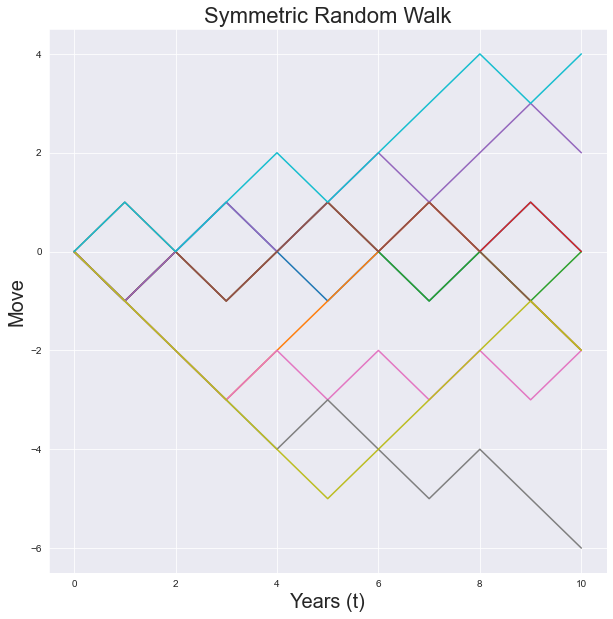

In [24]:
plt.figure(figsize=(10, 10))
plt.plot(rw_paths)
plt.xlabel("Years (t)", fontsize=20)
plt.ylabel("Move", fontsize=20)
plt.title("Symmetric Random Walk", fontsize=22)
plt.show()

### Properties of a Symmetric Random Walk

1. Independent increments
    * $E(M_{k_i+1} - M_{k_i})=0 $
    * $Var(M_{k_i+1} - M_{k_i})= k_{i+1} - k_i $
    * Variance accumulates at rate one per unit time

2. Martingale
    * Conditional expectation of next value in sequence is current position

3. Quadratic Variation

    * Computed Path-by-Path, one increment at a time

In [10]:
# Create Quadratic Variation and Variance functions

quadratic_variation = lambda x: round(np.square(x[:-1]-x[1:]).sum(), 3)
variance = lambda x: round(np.var(x, axis=0), 3)


In [14]:
[quadratic_variation(path) for path in rw_paths.T[:10]]

[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]

In [12]:
# 10 000 000 simulations
[variance(path) for path in rw_paths[1:11]]

[0.64, 0.96, 2.76, 3.4, 4.36, 4.04, 5.44, 4.36, 5.64, 6.56]

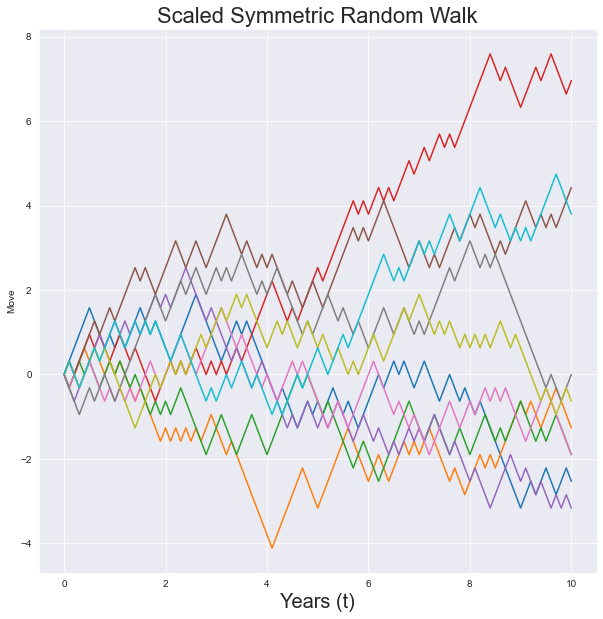

In [21]:
M = 10 # no. of simulations
t = 10 # Time
n = 10

### Scaled Symmetric Random Walk

random_walk = [-1, 1]
steps = (1/np.sqrt(n)) * np.random.choice(random_walk, size=(M, t*n)).T
origin = np.zeros((1, M))
srw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

time = np.linspace(0, t, t*n+1)
tt = np.full(shape=(M, t*n+1), fill_value=time)
tt = tt.T

plt.figure(figsize=(10, 10))
plt.plot(tt, srw_paths)
plt.xlabel("Years (t)", fontsize=20)
plt.ylabel("Move")
plt.title("Scaled Symmetric Random Walk", fontsize=22)
plt.show()

### Brownian Motion

* Non-differentiable at each step
* Stochastic in nature

In [17]:
# Parameters
M = 10 # number of simulations
t = 10 #time
n = 100 # steps we want to see
dt = t/n  # time steps

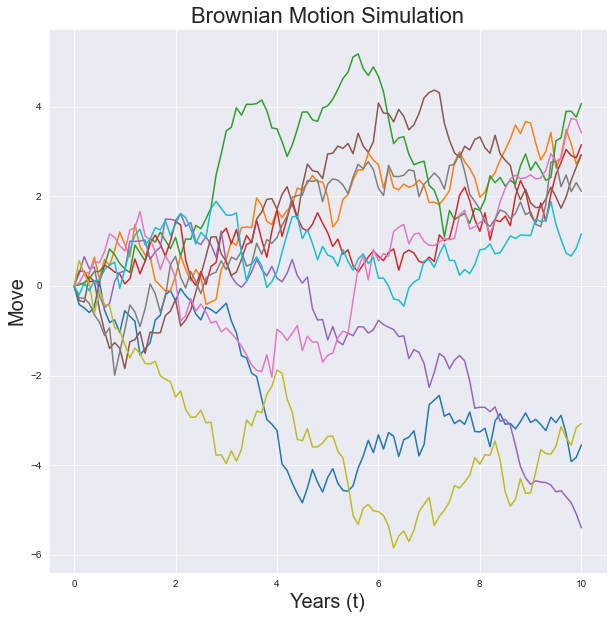

In [20]:
steps = np.random.normal(0, np.sqrt(dt), size=(M, n)).T
origin = np.zeros((1, M))
bm_paths = np.concatenate([origin, steps]).cumsum(axis=0)
time = np.linspace(0, t, n+1)
tt = np.full(shape=(M, n+1), fill_value=time)
tt = tt.T

sns.set_style("darkgrid")

plt.figure(figsize=(10, 10))
plt.plot(tt, bm_paths)
plt.xlabel("Years (t)", fontsize=20)
plt.ylabel("Move", fontsize=20)
plt.title("Brownian Motion Simulation", fontsize=22)

plt.show()